In [1]:
import pandas as pd
import numpy as np
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier, VotingClassifier
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
# Load and Prepare Data
print("Loading dataset...")
file_path = 'dataset.csv'
data = pd.read_csv(file_path)
print("Dataset loaded.")

Loading dataset...
Dataset loaded.


In [3]:
# Separate features and target label
X = data.drop(columns='label')
y = data['label']

In [4]:
# Feature Engineering: Adding Polynomial Features
print("Adding polynomial features...")
poly = PolynomialFeatures(degree=2, interaction_only=True, include_bias=False)
X_poly = poly.fit_transform(X)
feature_names = poly.get_feature_names_out(X.columns)
X_poly_df = pd.DataFrame(X_poly, columns=feature_names)
print("Polynomial features added.")

Adding polynomial features...
Polynomial features added.


Calculating correlation matrix...


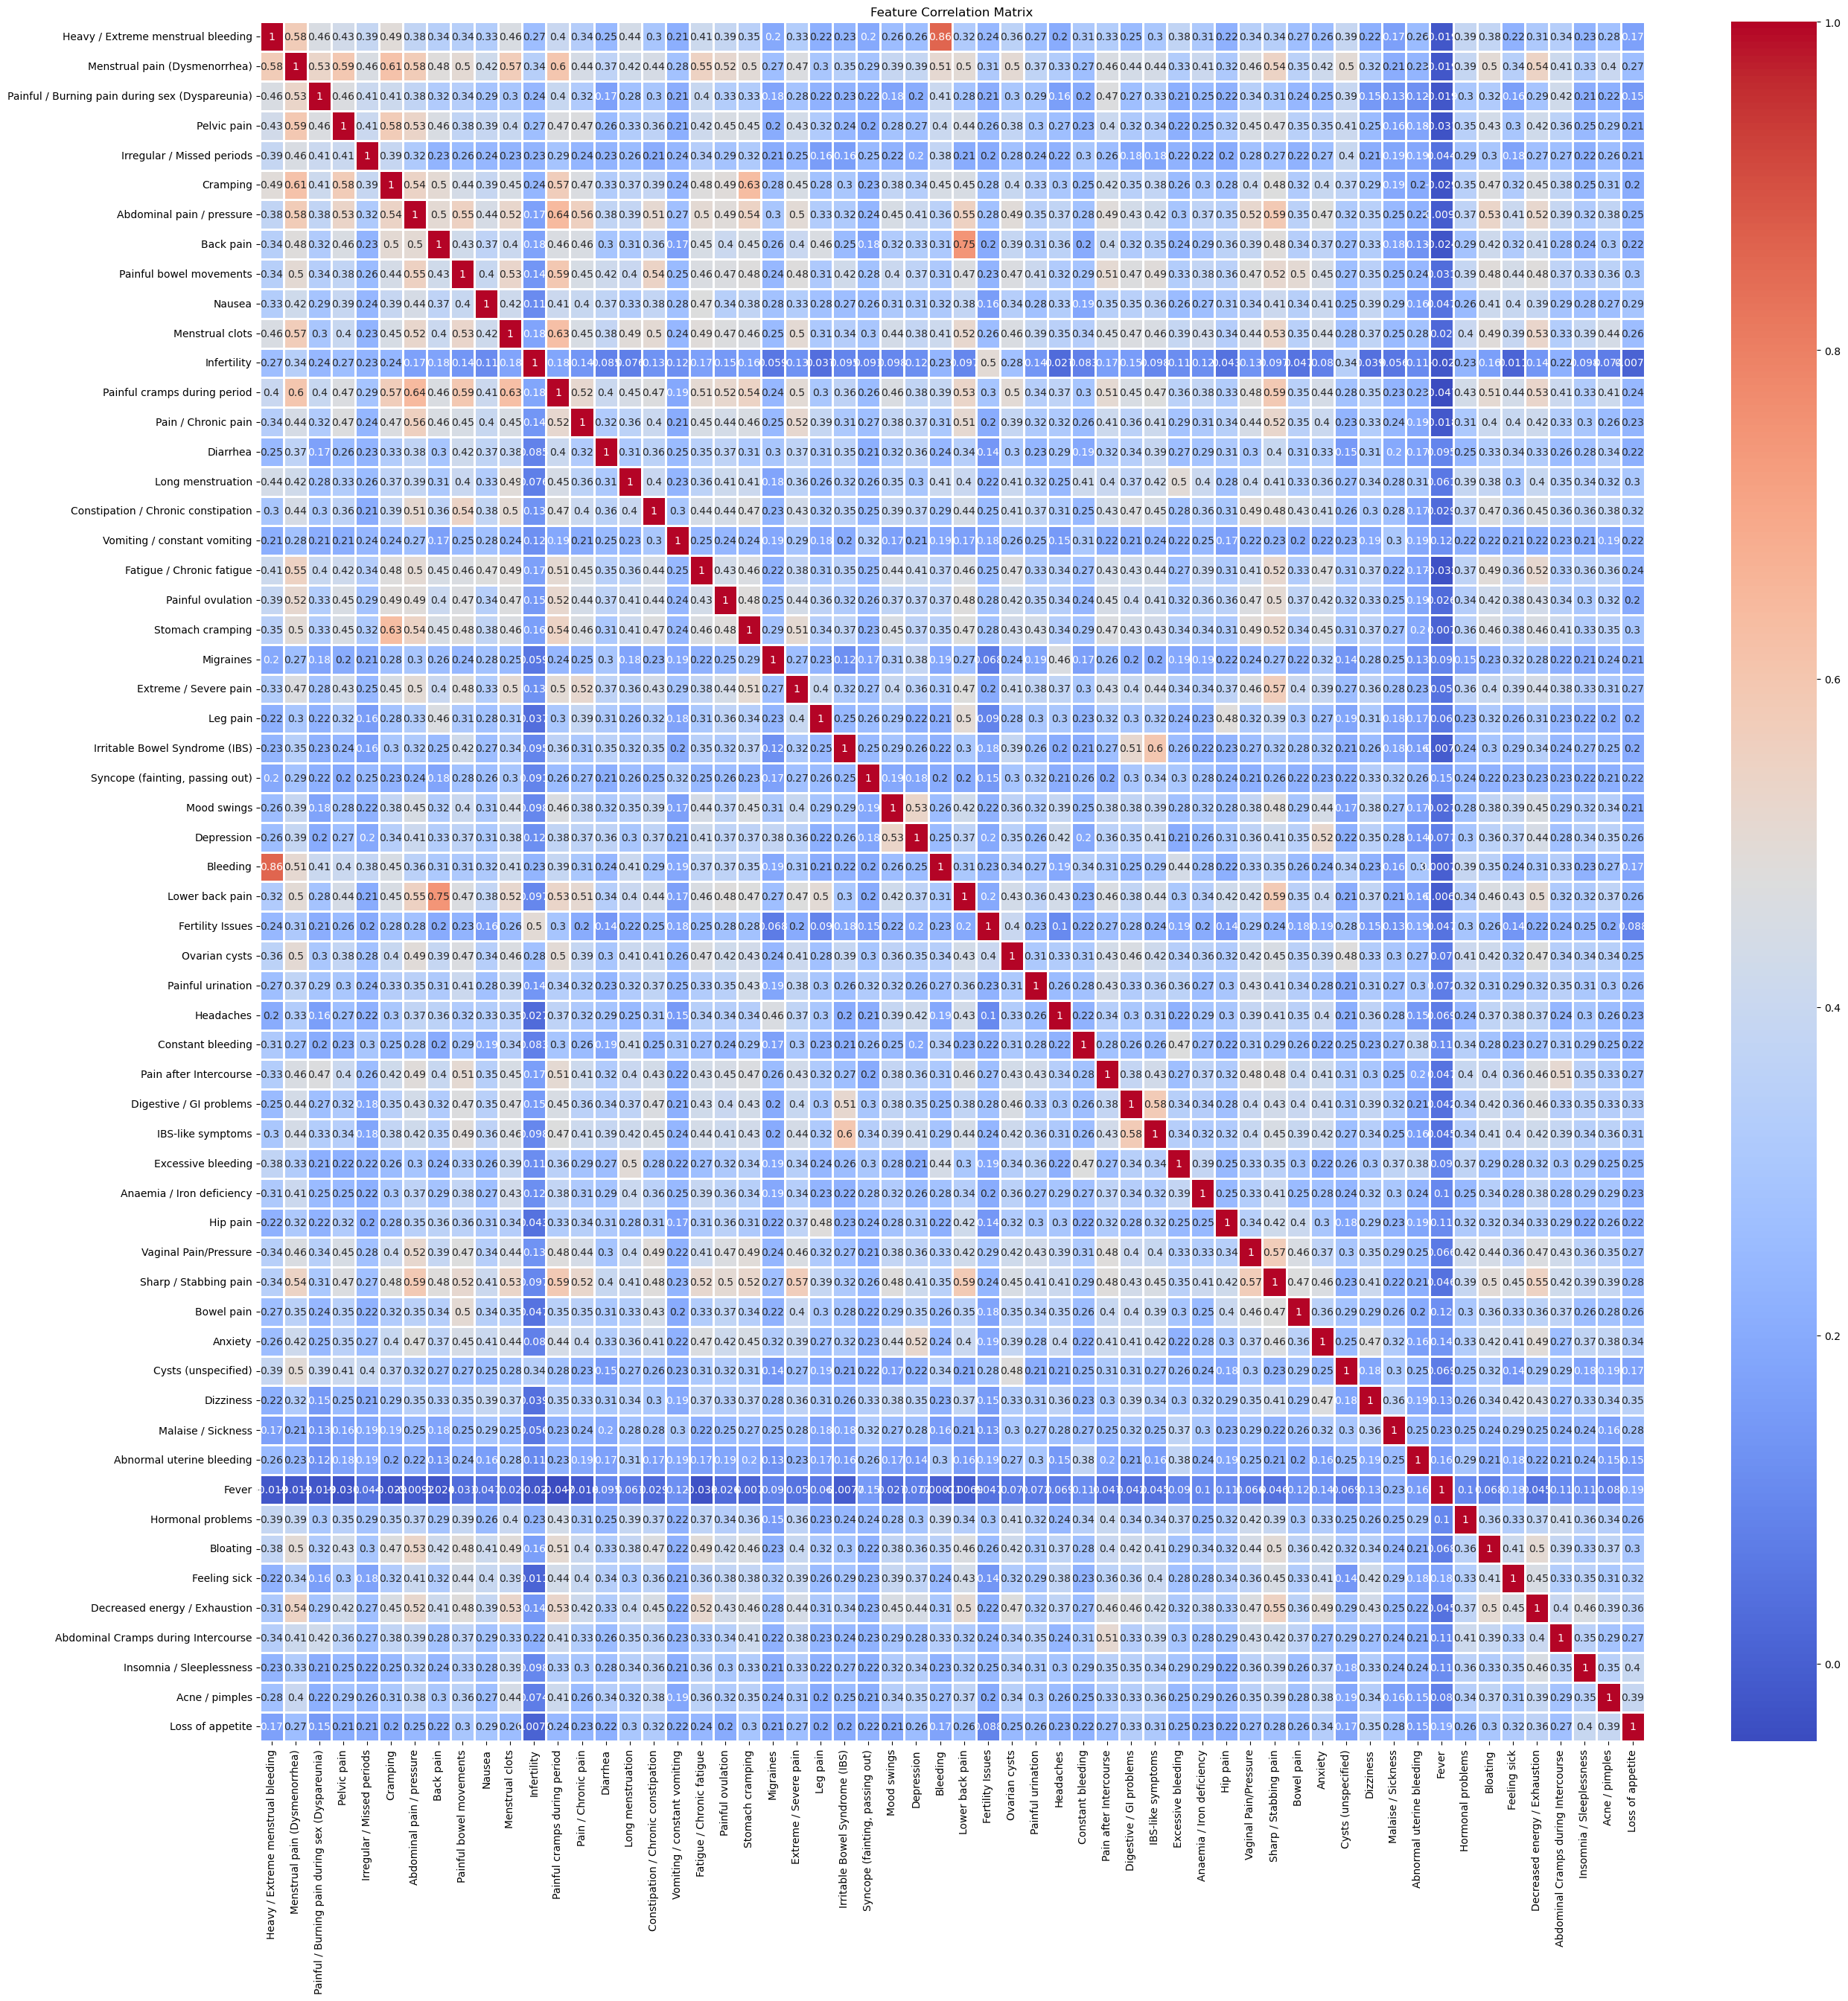

Correlation matrix plotted.


In [5]:
# Correlation Matrix
print("Calculating correlation matrix...")
corr_matrix = X.corr()
plt.figure(figsize=(30, 30))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.8)
plt.title('Feature Correlation Matrix')
plt.show()
print("Correlation matrix plotted.")

In [6]:
# Column indices for all features (after polynomial feature transformation)
binary_features = [i for i in range(X_poly_df.shape[1])]

In [7]:
# Preprocessor
print("Creating preprocessor...")
preprocessor = ColumnTransformer(
    transformers=[
        ('scaler', StandardScaler(), binary_features)
    ]
)


Creating preprocessor...


In [8]:
# Classifiers
print("Initializing classifiers...")
svc = SVC(probability=True)
dt = DecisionTreeClassifier()
gb = GradientBoostingClassifier()

Initializing classifiers...


In [9]:
# Voting Classifier
print("Creating voting classifier...")
voting_clf = VotingClassifier(
    estimators=[
        ('svc', svc),
        ('dt', dt),
        ('gb', gb)
    ],
    voting='soft'
)

Creating voting classifier...


In [10]:
# Pipeline
print("Creating pipeline...")
pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', voting_clf)
])

Creating pipeline...


In [11]:
# Train-Test Split
print("Splitting dataset into training and testing sets...")
X_train, X_test, y_train, y_test = train_test_split(X_poly_df, y, test_size=0.2, random_state=42)
print("Dataset split.")

Splitting dataset into training and testing sets...
Dataset split.


In [12]:
# Model Training and Evaluation
print("Training the pipeline...")
pipeline.fit(X_train, y_train)
y_pred = pipeline.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.4f}')

Training the pipeline...
Accuracy: 0.9270


In [13]:
# Cross-validation for better evaluation
print("Performing cross-validation...")
cv_scores = cross_val_score(pipeline, X_poly_df, y, cv=5)
print(f'Cross-validation accuracy: {cv_scores.mean():.4f}')

Performing cross-validation...
Cross-validation accuracy: 0.8748


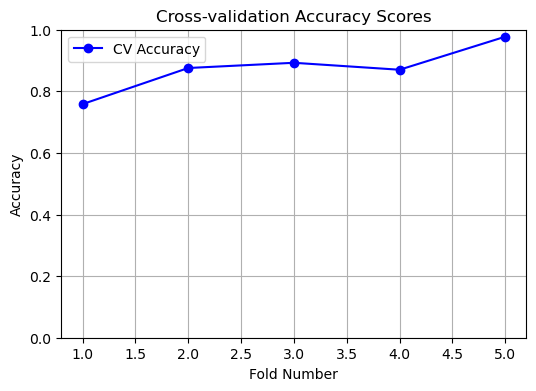

In [14]:
# Plotting the cross-validation results
plt.figure(figsize=(6, 4))
plt.plot(np.arange(1, len(cv_scores) + 1), cv_scores, marker='o', linestyle='-', color='blue', label='CV Accuracy')
plt.ylim(0, 1)
plt.xlabel('Fold Number')
plt.ylabel('Accuracy')
plt.title('Cross-validation Accuracy Scores')
plt.legend()
plt.grid(True)
plt.show()

In [15]:
# Final Evaluation
print("Evaluating the model...")
y_pred = pipeline.predict(X_test)
y_pred_proba = pipeline.predict_proba(X_test)[:, 1]

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred_proba)

print(f'Accuracy: {accuracy:.4f}')
print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'F1 Score: {f1:.4f}')
print(f'ROC AUC Score: {roc_auc:.4f}')

Evaluating the model...
Accuracy: 0.9270
Precision: 0.9789
Recall: 0.8942
F1 Score: 0.9347
ROC AUC Score: 0.9802


In [16]:
# Classification Report
print("\nClassification Report:\n", classification_report(y_test, y_pred))



Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.97      0.92        74
           1       0.98      0.89      0.93       104

    accuracy                           0.93       178
   macro avg       0.92      0.93      0.93       178
weighted avg       0.93      0.93      0.93       178




Confusion Matrix:



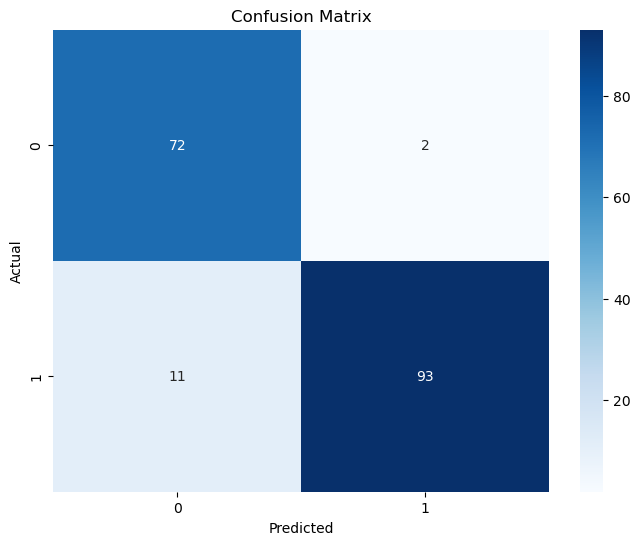

In [17]:
# Confusion Matrix
print("\nConfusion Matrix:\n")
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [18]:
# User Input for Prediction
print("Ready to predict new data points.")
def predict_new_data():
    try:
        print("Enter the values for the new data point:")
        new_data = []
        for feature in X.columns:
            value = float(input(f"Enter value for {feature}: "))
            new_data.append(value)
        new_data_poly = poly.transform([new_data])
        prediction = pipeline.predict(new_data_poly)
        prediction_proba = pipeline.predict_proba(new_data_poly)[:, 1]
        print(f'Predicted label: {prediction[0]}')
        print(f'Prediction probability: {prediction_proba[0]:.4f}')
    except Exception as e:
        print(f"Error in prediction: {e}")

Ready to predict new data points.


In [19]:
# Predict new data point
predict_new_data()

Enter the values for the new data point:
Enter value for Heavy / Extreme menstrual bleeding: 1
Enter value for Menstrual pain (Dysmenorrhea): 1
Enter value for Painful / Burning pain during sex (Dyspareunia): 1
Enter value for Pelvic pain: 1
Enter value for Irregular / Missed periods: 1
Enter value for Cramping: 1
Enter value for Abdominal pain / pressure: 1
Enter value for Back pain: 1
Enter value for Painful bowel movements: 1
Enter value for Nausea: 1
Enter value for Menstrual clots: 1
Enter value for Infertility: 1
Enter value for Painful cramps during period: 1
Enter value for Pain / Chronic pain: 1
Enter value for Diarrhea: 1
Enter value for Long menstruation: 1
Enter value for Constipation / Chronic constipation: 1
Enter value for Vomiting / constant vomiting: 1
Enter value for Fatigue / Chronic fatigue: 1
Enter value for Painful ovulation: 1
Enter value for Stomach cramping: 1
Enter value for Migraines: 1
Enter value for Extreme / Severe pain: 1
Enter value for Leg pain: 1
Ente

C:\Users\jinka\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(
C:\Users\jinka\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
C:\Users\jinka\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
